Accuracy: 0.8


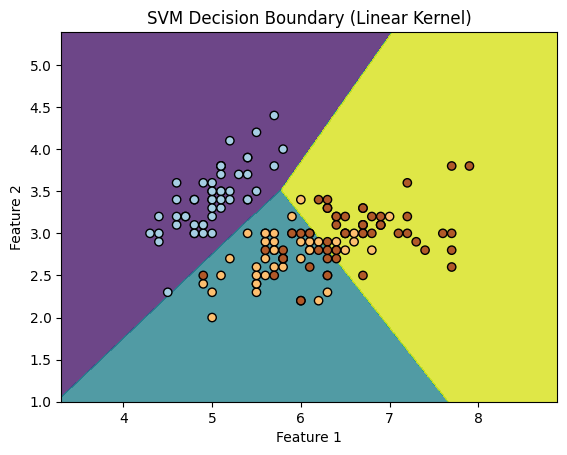

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Consider only the first two features for visualization purposes
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Support Vector Machine (SVM) classifier
clf = SVC(kernel='linear') # You can change the kernel to 'rbf' or 'poly' for non-linear SVMs

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Visualize the decision boundary
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

# Visualize the decision boundary of the SVM
plot_decision_boundary(X, y, clf, 'SVM Decision Boundary (Linear Kernel)')


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid to search
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1], 'kernel': ['linear', 'rbf']}

# Create the model and grid search
model = SVC()
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

In [ ]:
best_params

{'C': 9.180017724193847, 'gamma': 0.010177992858624706, 'kernel': 'rbf'}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define a parameter distribution to sample from
param_dist = {'C': uniform(0.1, 10), 'gamma': uniform(0.001, 0.1), 'kernel': ['linear', 'rbf']}

# Create the model and randomized search
model = SVC()
randomized_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5)
randomized_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = randomized_search.best_params_


In [ ]:
best_params

{'C': 9.180017724193847, 'gamma': 0.010177992858624706, 'kernel': 'rbf'}

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
df[df.target==0].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
from matplotlib import pyplot as plt

In [ ]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

In [ ]:
df0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [ ]:
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


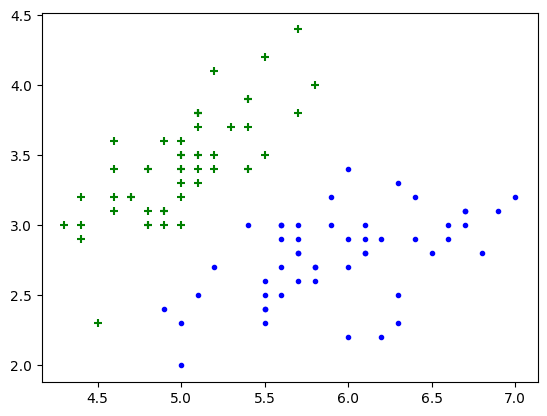

In [ ]:
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color = 'green', marker ='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color = 'blue', marker ='.')

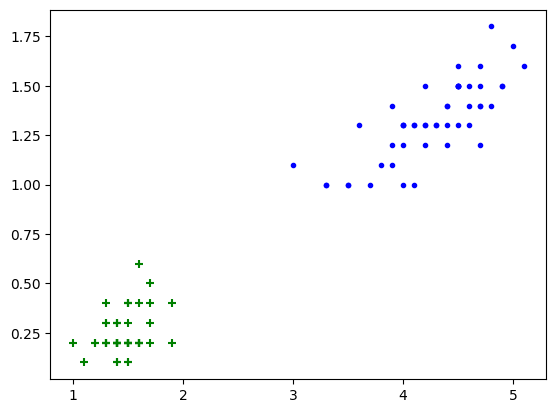

In [ ]:
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color = 'green', marker ='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color = 'blue', marker ='.')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = df.drop(['target','flower_name'], axis= 'columns')
x.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y=df['target']
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
x_train.shape

(120, 4)

In [ ]:
x_test.shape

(30, 4)

In [ ]:
from sklearn.svm import SVC

In [ ]:
Model = SVC()

In [ ]:
Model.fit(x_train,y_train)

SVC()

In [ ]:
Model.score(x_test, y_test)

0.9666666666666667

In [ ]:
from sklearn.svm import SVC
Model = SVC(gamma=100)

In [ ]:
Model.fit(x_train,y_train)

SVC(gamma=100)

In [ ]:
Model.score(x_test, y_test)

0.4666666666666667

In [ ]:
from sklearn.svm import SVC
Model = SVC(kernel='linear')
Model.fit(x_train,y_train)
Model.score(x_test, y_test)

0.9666666666666667

In [ ]:
import pandas as pd
from sklearn.datasets import load_digits
d = load_digits()

In [ ]:
d.target

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
dir(d)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
d.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
df = pd.DataFrame(d.data,d.target)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [ ]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
59    0
60    0
61    0
62    0
63    0
Length: 64, dtype: int64

In [ ]:
df['target']=d.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = df.drop(['target'],axis=1)
y=df['target']
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [ ]:
from sklearn.svm import SVC
rbf_model = SVC(kernel='rbf')

In [ ]:
rbf_model.fit(X_train, y_train)

SVC()

In [ ]:
rbf_model.score(X_test,y_test)

0.9944444444444445

Using Linear kernel

In [ ]:
linear_model = SVC(kernel='linear')
linear_model.fit(X_train,y_train)
linear_model.score(X_test,y_test)

0.975

Given Kernel value

In [59]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import numpy as np
data = load_iris()

X = data.data[:, :2]
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

S = StandardScaler()
X_train_s = S.fit_transform(X_train)
X_test_s = S.transform(X_test)

Kernel = 'linear'
c = 10

Model = SVC(kernel=Kernel,C=c)
Model.fit(X_train_s, y_train)
u = Model.predict(X_test)
score = Model.score(X_test, y_test)
print("Model Score:", score)


Model Score: 0.5333333333333333


#SVM with GridSearchCV


In [63]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC

data = load_iris()
X = data.data[:, :2]
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

S = StandardScaler()
X_train_s = S.fit_transform(X_train)
X_test_s = S.transform(X_test)

param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10]
}

Model = SVC()

grid_search = GridSearchCV(Model, param_grid, cv=5)
grid_search.fit(X_train_s, y_train)

best_params = grid_search.best_params_
best_kernel = best_params['kernel']
best_C = best_params['C']

best_model = SVC(kernel=best_kernel, C=best_C)
best_model.fit(X_train_s, y_train)

best_score = best_model.score(X_test_s, y_test)
print("Best Model:", best_params)
print("Best Model Score:", best_score)
print("Best Kernel:", best_kernel)
print("Best C:", best_C)

Best Model Score: {'C': 0.1, 'kernel': 'rbf'}
Best Model Score: 0.8666666666666667
Best Kernel: rbf
Best C: 0.1
